In [8]:
from sklearn.externals import joblib
from credentials import *
import tweepy
import csv
import sys
import os
import pandas as pd
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
 clf = joblib.load('C:\\Users\\Kaumudi\\Documents\\kmd\\Sentiment Analysis\\LinearSVC\\trained_modelBig.sav')

 auth = tweepy.AppAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
 api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [70]:
results = []
N = 1000
#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q= 'apple AND (iphone OR XS) -filter:retweets', lang='en').items(N):
    results.append(tweet)


In [11]:
results

[Status(_api=<tweepy.api.API object at 0x00000203741220F0>, _json={'created_at': 'Sat Jun 01 07:29:25 +0000 2019', 'id': 1134723610491232257, 'id_str': '1134723610491232257', 'text': '@oneplus I owned one .. \nPros :\n1) High quality clarity loud sound \n2) good battery life\n3) voice calls are clearer… https://t.co/qgDFs9YIiC', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'oneplus', 'name': 'OnePlus', 'id': 2196922086, 'id_str': '2196922086', 'indices': [0, 8]}], 'urls': [{'url': 'https://t.co/qgDFs9YIiC', 'expanded_url': 'https://twitter.com/i/web/status/1134723610491232257', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1134444417434226688, 'in_reply_to_status_id_str': '1134444417434226688', 'in_reply_to_user_id': 219692

In [12]:
 def toDataFrame(tweets):
        DataSet = pd.DataFrame()
        DataSet['tweetID'] = [tweet.id for tweet in tweets]
        DataSet['tweetText'] = [tweet.text for tweet in tweets]
        DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
        DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
        DataSet['tweetSource'] = [tweet.source for tweet in tweets]
        DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
        DataSet['userID'] = [tweet.user.id for tweet in tweets]
        DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
        DataSet['userName'] = [tweet.user.name for tweet in tweets]
        DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
        DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
        DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
        DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
        DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
        DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
        return DataSet


In [14]:
get_tweets = toDataFrame(results)
get_tweets.head(2)
    

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,1134723610491232257,@oneplus I owned one .. \nPros :\n1) High qual...,0,1,Twitter for Android,2019-06-01 07:29:25,280503749,skewnith,Vigneswaran Arumugam,2011-04-11 13:16:13,Think well before to follow me,405,834,Madurai,None
1,1133054302107291649,"@oppo I dont love oppo smartphone,its so costl...",0,1,Twitter for Android,2019-05-27 16:56:11,1132188694222319616,vc_abhishek,Abhishek VC,2019-05-25 07:36:34,call me abhi\nwish me on 13 oct\n#kasrodian\nF...,0,18,,None


In [15]:
get_tweets.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
count_vectorizer = joblib.load('C:\\Users\\Kaumudi\\Documents\\kmd\\Sentiment Analysis\\LinearSVC\\count_vectBig.sav')
    

C:\anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
get_tweets['NText'] = count_vectorizer.transform(get_tweets['tweetText'])


In [17]:
print(get_tweets)
print('--------------------------------------------------')
    #get_tweets.head(2)
get_tweets['Sentiment'] = 0
type(get_tweets)
    #get_tweets.shape
    #get_tweets.head(2)
N1 = get_tweets.shape[0]

prob = clf.predict_proba(get_tweets.at[0,'NText'])
count = 0
    

               tweetID                                          tweetText  \
0  1134723610491232257  @oneplus I owned one .. \nPros :\n1) High qual...   
1  1133054302107291649  @oppo I dont love oppo smartphone,its so costl...   

   tweetRetweetCt  tweetFavoriteCt          tweetSource        tweetCreated  \
0               0                1  Twitter for Android 2019-06-01 07:29:25   
1               0                1  Twitter for Android 2019-05-27 16:56:11   

                userID   userScreen              userName        userCreateDt  \
0            280503749     skewnith  Vigneswaran Arumugam 2011-04-11 13:16:13   
1  1132188694222319616  vc_abhishek           Abhishek VC 2019-05-25 07:36:34   

                                            userDesc  userFollowerCt  \
0                     Think well before to follow me             405   
1  call me abhi\nwish me on 13 oct\n#kasrodian\nF...               0   

   userFriendsCt userLocation userTimezone  \
0            834      M

In [22]:
for i in range(N1-1):
    print(prob[i],np.argmax(prob[i]),"\n")
    count = count+1
    get_tweets['Sentiment'] = np.argmax(prob)

    

[0.06961423 0.23740347 0.6929823 ] 2 



In [25]:
 for i in range(count):
        get_tweets.at[i,'Sentiment'] = np.argmax(prob[i])

    


In [26]:
get_tweets['Sentiment'].value_counts()

2    2
Name: Sentiment, dtype: int64

In [31]:
print('------------ANALYZED TWEETS----------')
pd.options.display.max_colwidth = 500


------------ANALYZED TWEETS----------


In [36]:
 print(get_tweets[['tweetText','Sentiment']])

pd.options.mode.chained_assignment = None  # default='warn'



                                                                                                                                          tweetText  \
0  @oneplus I owned one .. \nPros :\n1) High quality clarity loud sound \n2) good battery life\n3) voice calls are clearer… https://t.co/qgDFs9YIiC   
1      @oppo I dont love oppo smartphone,its so costly,mi is better than this have a good battery life and its available a… https://t.co/VfvSzQSVMK   

   Sentiment  
0          2  
1          2  


In [37]:
valuecnts = get_tweets['Sentiment'].value_counts()

In [38]:
df0 = valuecnts.rename_axis('sentnames').reset_index(name='counts')

In [39]:
df0 = df0[(df0.sentnames<3)]

In [40]:
 print('debug df0')

debug df0


In [41]:
print (df0)

   sentnames  counts
0          2       2


In [42]:
 print(type(df0))

<class 'pandas.core.frame.DataFrame'>


In [43]:
 df0['sentnames']=df0['sentnames'].replace({0:'Negative',1:'Neutral',2:'Positive'})

In [44]:
if((df0['sentnames']=='Negative').any() == False):
        df_sub = pd.DataFrame({'sentnames':['Negative'],'counts':[0]})
        print(df_sub)
        

  sentnames  counts
0  Negative       0


In [45]:
df0 = df0.append(df_sub)

In [48]:
if((df0['sentnames']=='Positive').any() == False):
    df_sub = pd.DataFrame({'sentnames':['Positive'],'counts':[0]})
    print(df_sub)
    df0 = df0.append(df_sub)


In [49]:
if((df0['sentnames']=='Neutral').any() == False):
        df_sub = pd.DataFrame({'sentnames':['Neutral'],'counts':[0]})
        print(df_sub)
        df0 = df0.append(df_sub)
    

  sentnames  counts
0   Neutral       0


In [50]:
 print(df0)

  sentnames  counts
0  Positive       2
0  Negative       0
0   Neutral       0


In [51]:
df=df0.sort_values(by=['sentnames'])

In [52]:
print(df)

  sentnames  counts
0  Negative       0
0   Neutral       0
0  Positive       2


In [54]:
colors = ["#F44336", "#2196F3", "#4CAF50"]
fig = plt.figure(dpi=400)


<Figure size 2400x1600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x203763b1f60>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, ''),
  Text(3.6739403974420595e-17, 0.6, ''),
  Text(-1.1021821192326178e-16, -0.6, '100.00%')])

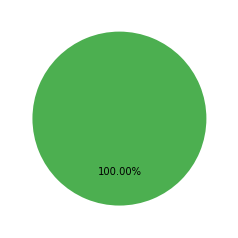

In [60]:
def my_autopct(pct):
    return ('%.2f' % pct)+'%' if pct > 0 else ''
plt.pie(
        # using data total)arrests
        df['counts'],
        # with the labels being officer names
        #labels=df['sentnames'],
        # with no shadows
        shadow=False,
        # with colors
        colors=colors,
        # with one slide exploded out
        #explode=(0, 0, 0, 0, 0.15),
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        #autopct='%1.2f%%',
        autopct=my_autopct,
        )




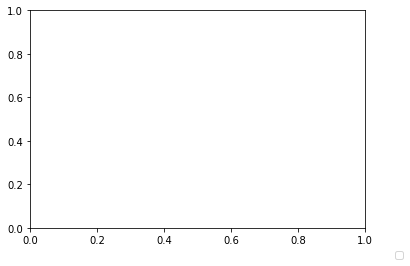

In [61]:
plt.legend(df['sentnames'], bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)

In [65]:
fig
fig.savefig('C:\\Users\\Kaumudi\\Documents\\kmd\\Sentiment Analysis\\LinearSVC\\dango\\assets\\pie.png', dpi=fig.dpi, transparent = True)


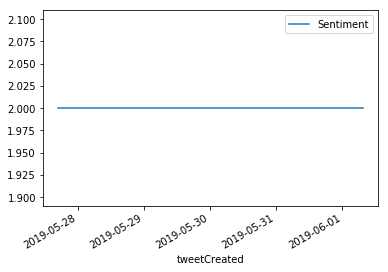

In [66]:
timeGraph = get_tweets.plot('tweetCreated','Sentiment').get_figure()

In [67]:
timeGraph.savefig('C:\\Users\\Kaumudi\\Documents\\kmd\\Sentiment Analysis\\LinearSVC\\dango\\assets\\graph.png', dpi=fig.dpi, transparent = True)

In [68]:
timeGraph.legend(loc='lower left', bbox_to_anchor= (0.0, 2.01))

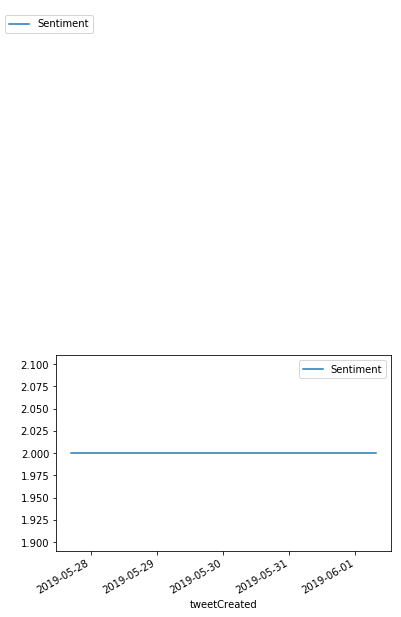

In [69]:
timeGraph